<a href="https://colab.research.google.com/github/shashwat-dubey/ML/blob/master/KerasTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow import keras as K
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


In [0]:
(X_train, Y_train), (x_test, y_test) = mnist.load_data()

In [12]:
print("X_train.shape : " + str(X_train.shape))
print("Y_train.shape : " + str(Y_train.shape))
print("x_test.shape : " + str(x_test.shape))
print("y_test.shape : " + str(y_test.shape))

X_train.shape : (60000, 28, 28)
Y_train.shape : (60000,)
x_test.shape : (10000, 28, 28)
y_test.shape : (10000,)


7


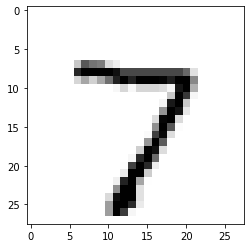

In [21]:
plt.imshow(x_test[0], cmap='Greys')
print(y_test[0])

## Preprocessing the input data
1. Reshape the train & test data.
>
    * From mnist database the X_train data has come in (60000 * 28 * 28) 3D array format, convert to (60000, 28 * 28) 2D array.
    * From mnist database the X_test  data has come in (10000 * 28 * 28) 3D array format, convert to (10000, 28 * 28) 2D array.
2. Convert datatype to float32.
3. Devide by 255, so that every sample lies between [0, 1]

In [31]:
X_train = X_train.reshape(X_train.shape[0], -1)     # Alternatively, X_train.reshape(60000, 28*28) or X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test  = X_test.reshape (X_test.shape[0] , -1)
print("New X_train.shape : " + str(X_train.shape))
print("New X_test.shape  : " + str(X_test.shape))
print("\n\n\n X_train[0] before float conversion & devision by 255:\n")
print(X_train[0])

X_train = X_train.astype('float32')/255.0
X_test  = X_test.astype('float32')/255.0


print("\n\n\n X_train[0] after float conversion & devision by 255:\n")
print(X_train[0])

New X_train.shape : (60000, 784)
New X_test.shape  : (10000, 784)



 X_train[0] before float conversion & devision by 255:

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82